# Collections Module

- This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers such as `dict`, `list`, `set`, and `tuple`.

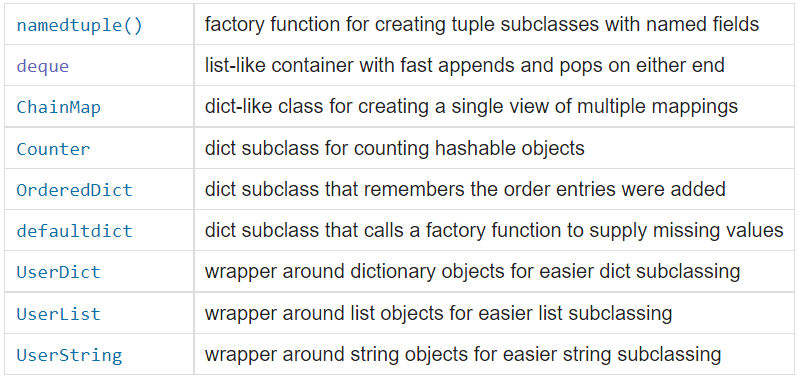

- Reference links:
    
    - [Python Documentation on Collections Module](https://docs.python.org/3/library/collections.html)
    
    - [GFG Article](https://www.geeksforgeeks.org/python-collections-module/)
    
- In this notebook, we will see some common classes which are useful in a variety of applications.

## `Counter` class 

- A counter tool is provided to support convenient and rapid tallies.

- A Counter is a `dict` subclass for counting hashable objects. 

- It is a collection where **elements** are stored as **dictionary keys** and their **counts** are stored as **dictionary values**. 

- Counts are allowed to be any integer value including zero or negative counts. 

- The Counter class is similar to bags or multisets in other languages.

- Elements are counted from an iterable or initialized from another mapping (or counter).

- Counter objects have a dictionary interface except that they **return a zero count** for missing items instead of raising a `KeyError`.

- Setting a count to zero does not remove an element from a counter. Use `del` to remove it entirely.

- It has additional methods than the ones supported by dictionaries, here are some useful methods:

    - `elements()`: returns an iterator of elements, where each unique element appears the number of times it is present in the counter.
    
    - `most_common(n)`: returns a list of `n` most common elements from the counter. Ties are broken down by the order in which they appear in the counter.

In [13]:
from collections import Counter

# creating a Counter object from an iterable
s = 'fffeeeeeddddaaaabbbbbbcccgggghhhh'
c = Counter(s)
print(c)

# accessing things
print(c['a'])
print(c['z']) # returns 0

# updating stuff
c['a'] += 2
c['x'] += 3
print(c)

Counter({'b': 6, 'e': 5, 'd': 4, 'a': 4, 'g': 4, 'h': 4, 'f': 3, 'c': 3})
4
0
Counter({'a': 6, 'b': 6, 'e': 5, 'd': 4, 'g': 4, 'h': 4, 'f': 3, 'c': 3, 'x': 3})


In [4]:
# creating a Counter object from a mapping, such as a dictionary
c = Counter({
    'apple': 10,
    'mango': 5,
    'banana': 7
})
print(c)

Counter({'apple': 10, 'banana': 7, 'mango': 5})


In [6]:
# creating a Counter object from keyword args
c = Counter(a = 10, b = 4, c = 6)
print(c)

Counter({'a': 10, 'c': 6, 'b': 4})


In [7]:
# has methods of dictionaries
c = Counter('aaaaabbbcccccc')
print(c.keys())
print(c.values())
print(c.items())

dict_keys(['a', 'b', 'c'])
dict_values([5, 3, 6])
dict_items([('a', 5), ('b', 3), ('c', 6)])


In [10]:
# elements() method
c = Counter('aaaaabbbbddddeeeccccggggfffhhhh')
print(c.elements())
print(list(c.elements()))

['a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'c', 'c', 'c', 'c', 'g', 'g', 'g', 'g', 'f', 'f', 'f', 'h', 'h', 'h', 'h']


In [12]:
# most_common() method
print(c.most_common())
print(c.most_common(1))
print(c.most_common(2))
print(c.most_common(3))

[('a', 5), ('b', 4), ('d', 4), ('c', 4), ('g', 4), ('h', 4), ('e', 3), ('f', 3)]
[('a', 5)]
[('a', 5), ('b', 4)]
[('a', 5), ('b', 4), ('d', 4)]


## `deque` class

- Deques are a generalization of stacks and queues (the name is pronounced “deck” and is short for “double-ended queue”).

- Deques support *thread-safe, memory efficient appends and pops* from either side of the deque with approximately the same $O(1)$ performance in either direction.

- Though list objects support similar operations, they are optimized for fast fixed-length operations and incur $O(n)$ memory movement costs for `pop(0)` and `insert(0, v)` operations which change both the size and position of the underlying data representation.

- Deques are helpful when we are interested in the most recent transactions of data.

- Here are some useful methods:

    - `append(x)`: inserts `x` at the **rear** end of the deque.
    
    - `appendleft(x)`: inserts `x` at the **front** end of the deque.
    
    - `pop()`: removes and returns the element at the **rear** end.
    
    - `popleft()`: removes and returns the element at the **front** end.
    
    - `clear()`: removes all elements from the deque.
    
- There are other useful methods as well, refer the documentation for the same.
    
- Note: `pop()` and `popleft()` raise an `IndexError` incase the deque is empty.
    

In [18]:
from collections import deque

# Creating a deque from an iterable
dq = deque('abcdbcda')
print(dq)
print(len(dq))
for elem in dq:
    print(elem)

deque(['a', 'b', 'c', 'd', 'b', 'c', 'd', 'a'])
8
a
b
c
d
b
c
d
a


In [16]:
# Creating an empty deque
dq = deque()
print(dq)

deque([])


In [19]:
# popping and pushing element
dq = deque()
dq.append(10)
dq.appendleft(20)
dq.appendleft(15)
dq.append(12)
print(dq)
print(dq.pop(), dq)
print(dq.popleft(), dq)

deque([15, 20, 10, 12])
12 deque([15, 20, 10])
15 deque([20, 10])


## `defaultdict` class

- defaultdict is a subclass of the built-in `dict` class. 

- It overrides one method and adds one writable instance variable. The remaining functionality is the same as for the `dict` class.

- `class collections.defaultdict(default_factory=None, /[, ...])`

    - The first argument provides the initial value for the `default_factory` attribute; it defaults to `None`. All remaining arguments are treated the same as if they were passed to the dict constructor, including keyword arguments.
    
- The main difference from a `dict` is that, incase a given key is missing in the defaultdict, these scenarios arise:
    
    - If `default_factory` is set to `None`, it raises a `KeyError`.
    
    - If default_factory is not `None`, it is called without arguments to provide a default value for the given key, this value is inserted in the dictionary for the key, and returned.

In [20]:
# KeyError in dictionary
d = dict()
d[1] = 100
print(d[2])

KeyError: 2

In [23]:
from collections import defaultdict

# we can avoid this by specifying a default value for an item -> uses default_factory argument
# for example, return 0 for an item not present in the defaultdict

d = defaultdict(lambda: 0)
d[1] = 100
print(d.items())
print(d[2])
print(d.items())

dict_items([(1, 100)])
0
dict_items([(1, 100), (2, 0)])
